## Classification: Which demographic, clinical, and exercise-related features are the most significant predictors of heart disease?

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from mpl_toolkits import mplot3d
import seaborn as sns

In [43]:
# Load the dataset
file_path = 'C:/Users/ttas/assignments/Heart_Failure_Prediction_Team_0/data/raw/heart.csv'

# Check if the file exists
import os
if os.path.exists(file_path):
    data = pd.read_csv(file_path)
    print("File loaded successfully!")
else:
    print("Error: File not found at the specified path.")


File loaded successfully!


In [44]:
# Load the dataset
heart_df = pd.read_csv('C:/Users/ttas/assignments/Heart_Failure_Prediction_Team_0/data/raw/heart.csv')
heart_df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [45]:
# Check for duplicates
heart_df.duplicated().sum()

0

In [46]:
# Inspect the data
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [47]:
# Convert all columns to numeric data

from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
encoder = LabelEncoder()

# Apply encoding to non-numeric columns
categorical_columns = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
for col in categorical_columns:
    data[col] = encoder.fit_transform(data[col])

# Check the updated data types
print(data.dtypes)


Age                 int64
Sex                 int32
ChestPainType       int32
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG          int32
MaxHR               int64
ExerciseAngina      int32
Oldpeak           float64
ST_Slope            int32
HeartDisease        int64
dtype: object


Heatmaps show correlations, feature relationships, and distributions.
Darker and more intense colours represent stronger relationships (positive or negative).
Neutral colours indicate weaker or no relationships.
The diagonal shows a perfect correlation of 1.0 because a variable is always perfectly correlated with itself.
Values close to -1 indicate a strong inverse relationship (as one variable increases, the other decreases.)
Values close to 0 imply no significant ralationship between the variables.
Note, correlations do not imply causation. Correlations help us identify trends to analyze data.


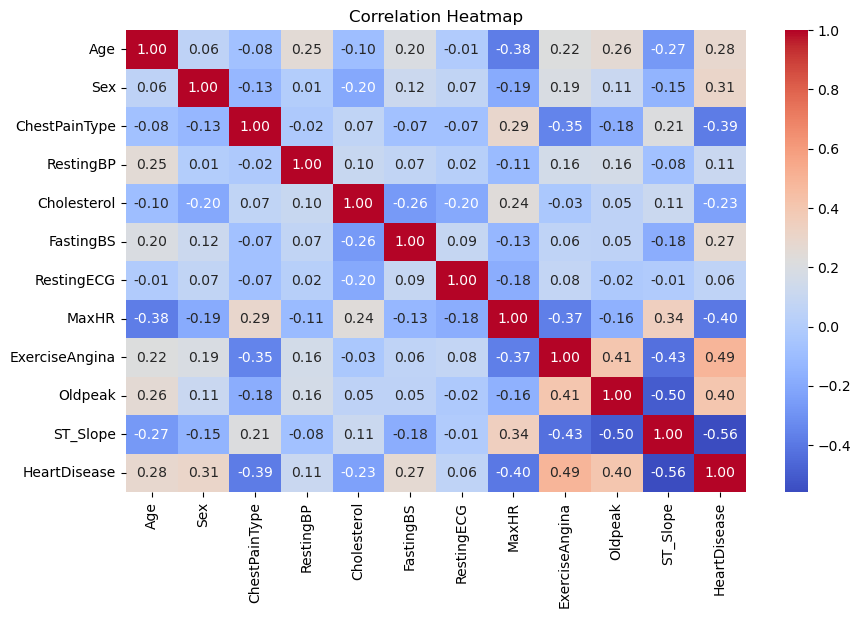

In [48]:
# Create a correlation heatmap to analyze the data
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


Highest correlations observed are between:
ST_Slope and Oldpeak (-0.50)
HeartDisease and ST_Slope (-0.56)


Analysis:
1. ST_Slope and Oldpeak (-0.50):

A moderate negative correlation of -0.50 indicates that as ST_Slope decreases, Oldpeak tends to increase.
In medical terms, ST_Slope describes the slope of the ST segment in an ECG, and Oldpeak refers to ST depress relative to rest, often linked to heart stress or ischemia. 
This negative correlation suggests that patients with more severe ST depression (higher Oldpeak) may also have downward or less favourable ST slopes.

2. HeartDisease and ST_Slope (-0.56):

The negative correlation of -0.56 is stronger, showing a more pronounced inverse relationship. As ST_Slope values decrease, the likelihood of HeartDisease increases.
In the medical field, certain ST slope patterns are considered significant indicators of heart disease. A flatter or downward slope is often linked to poorer heart function.

Insights:
Both correlations reinforce the importance of ST_Slope as a predictive feature for heart disease.

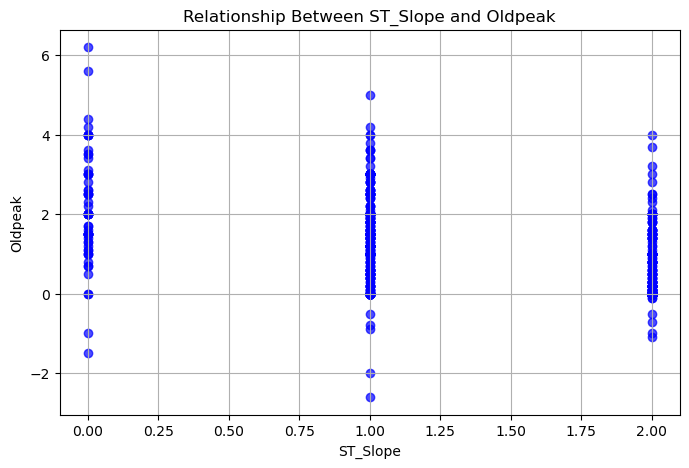

In [49]:
# Create scatter plot to visualize the relationship between ST_Slope and Oldpeak

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.scatter(data['ST_Slope'], data['Oldpeak'], alpha=0.7, c='blue')
plt.title('Relationship Between ST_Slope and Oldpeak')
plt.xlabel('ST_Slope')
plt.ylabel('Oldpeak')
plt.grid(True)
plt.show()


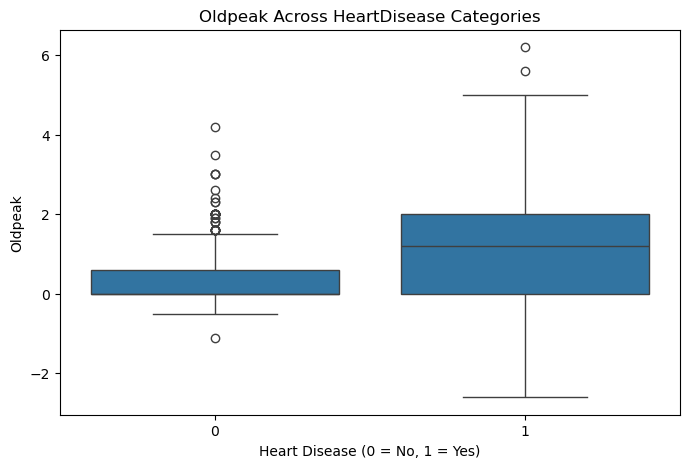

In [50]:
# Create box plot to compare the distribution of Oldpeak across different categories of HeartDisease

import seaborn as sns

plt.figure(figsize=(8, 5))
sns.boxplot(x='HeartDisease', y='Oldpeak', data=data)
plt.title('Oldpeak Across HeartDisease Categories')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Oldpeak')
plt.show()


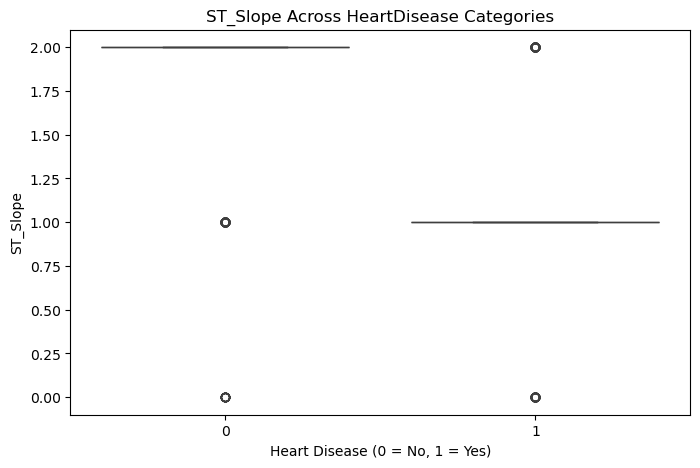

In [51]:
# Create box plot to compare the distribution of ST_Slope across different categories of HeartDisease

import seaborn as sns

plt.figure(figsize=(8, 5))
sns.boxplot(x='HeartDisease', y='ST_Slope', data=data)
plt.title('ST_Slope Across HeartDisease Categories')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('ST_Slope')
plt.show()


<Axes: >

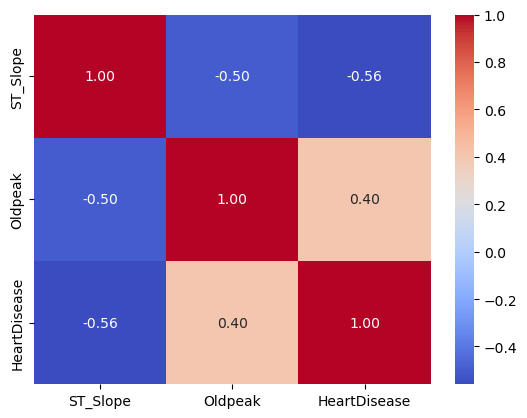

In [52]:
# Create heatmap to show relationships between the three variables
sns.heatmap(data[['ST_Slope', 'Oldpeak', 'HeartDisease']].corr(), annot=True, cmap='coolwarm', fmt='.2f')


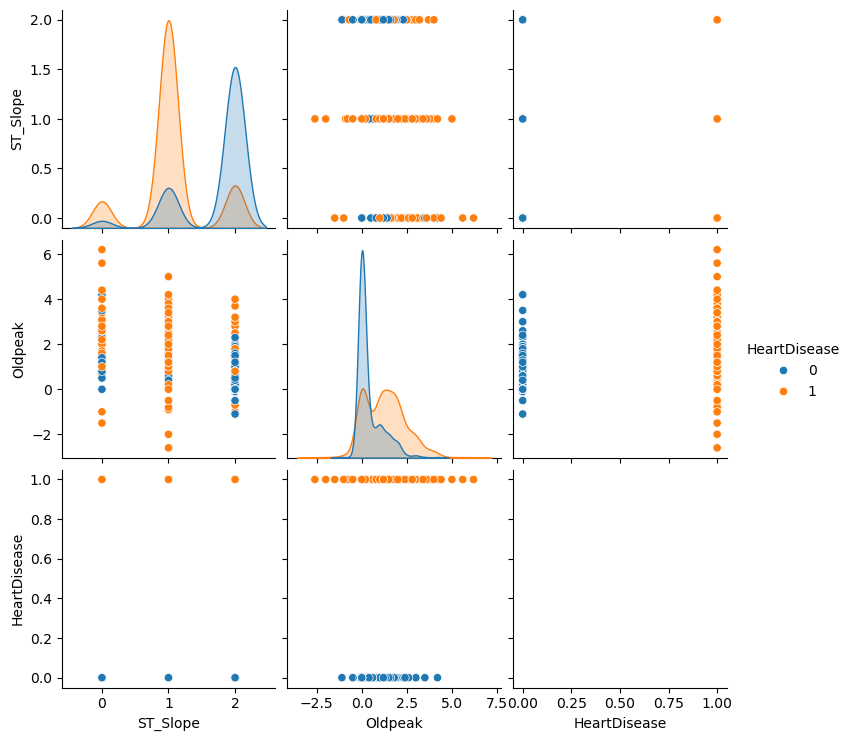

In [53]:
# Create pair plot to visualize scatter plots and distributions for multiple variables in one view
sns.pairplot(data, vars=['ST_Slope', 'Oldpeak', 'HeartDisease'], hue='HeartDisease')


Text(0.5, 1.0, 'Regression Between Oldpeak and ST_Slope')

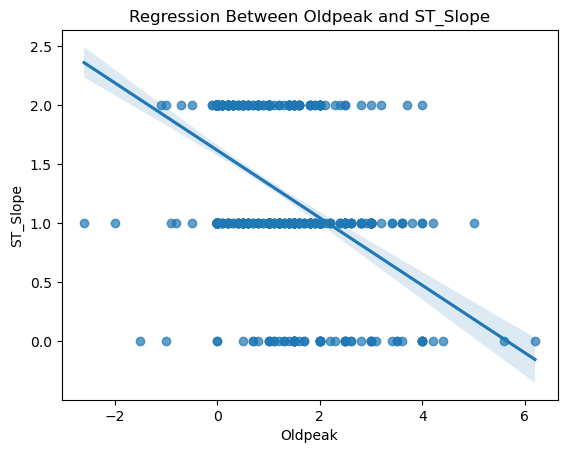

In [54]:
# Create a regression plot to analyze the trend between Oldpeak and ST_Slope
sns.regplot(x='Oldpeak', y='ST_Slope', data=data, scatter_kws={'alpha':0.7})
plt.title('Regression Between Oldpeak and ST_Slope')


In [55]:
# Create interactive scatterplot
import plotly.express as px

fig = px.scatter(data, x='ST_Slope', y='Oldpeak', color='HeartDisease',
                 title='Interactive Scatter Plot: ST_Slope vs Oldpeak')
fig.show()


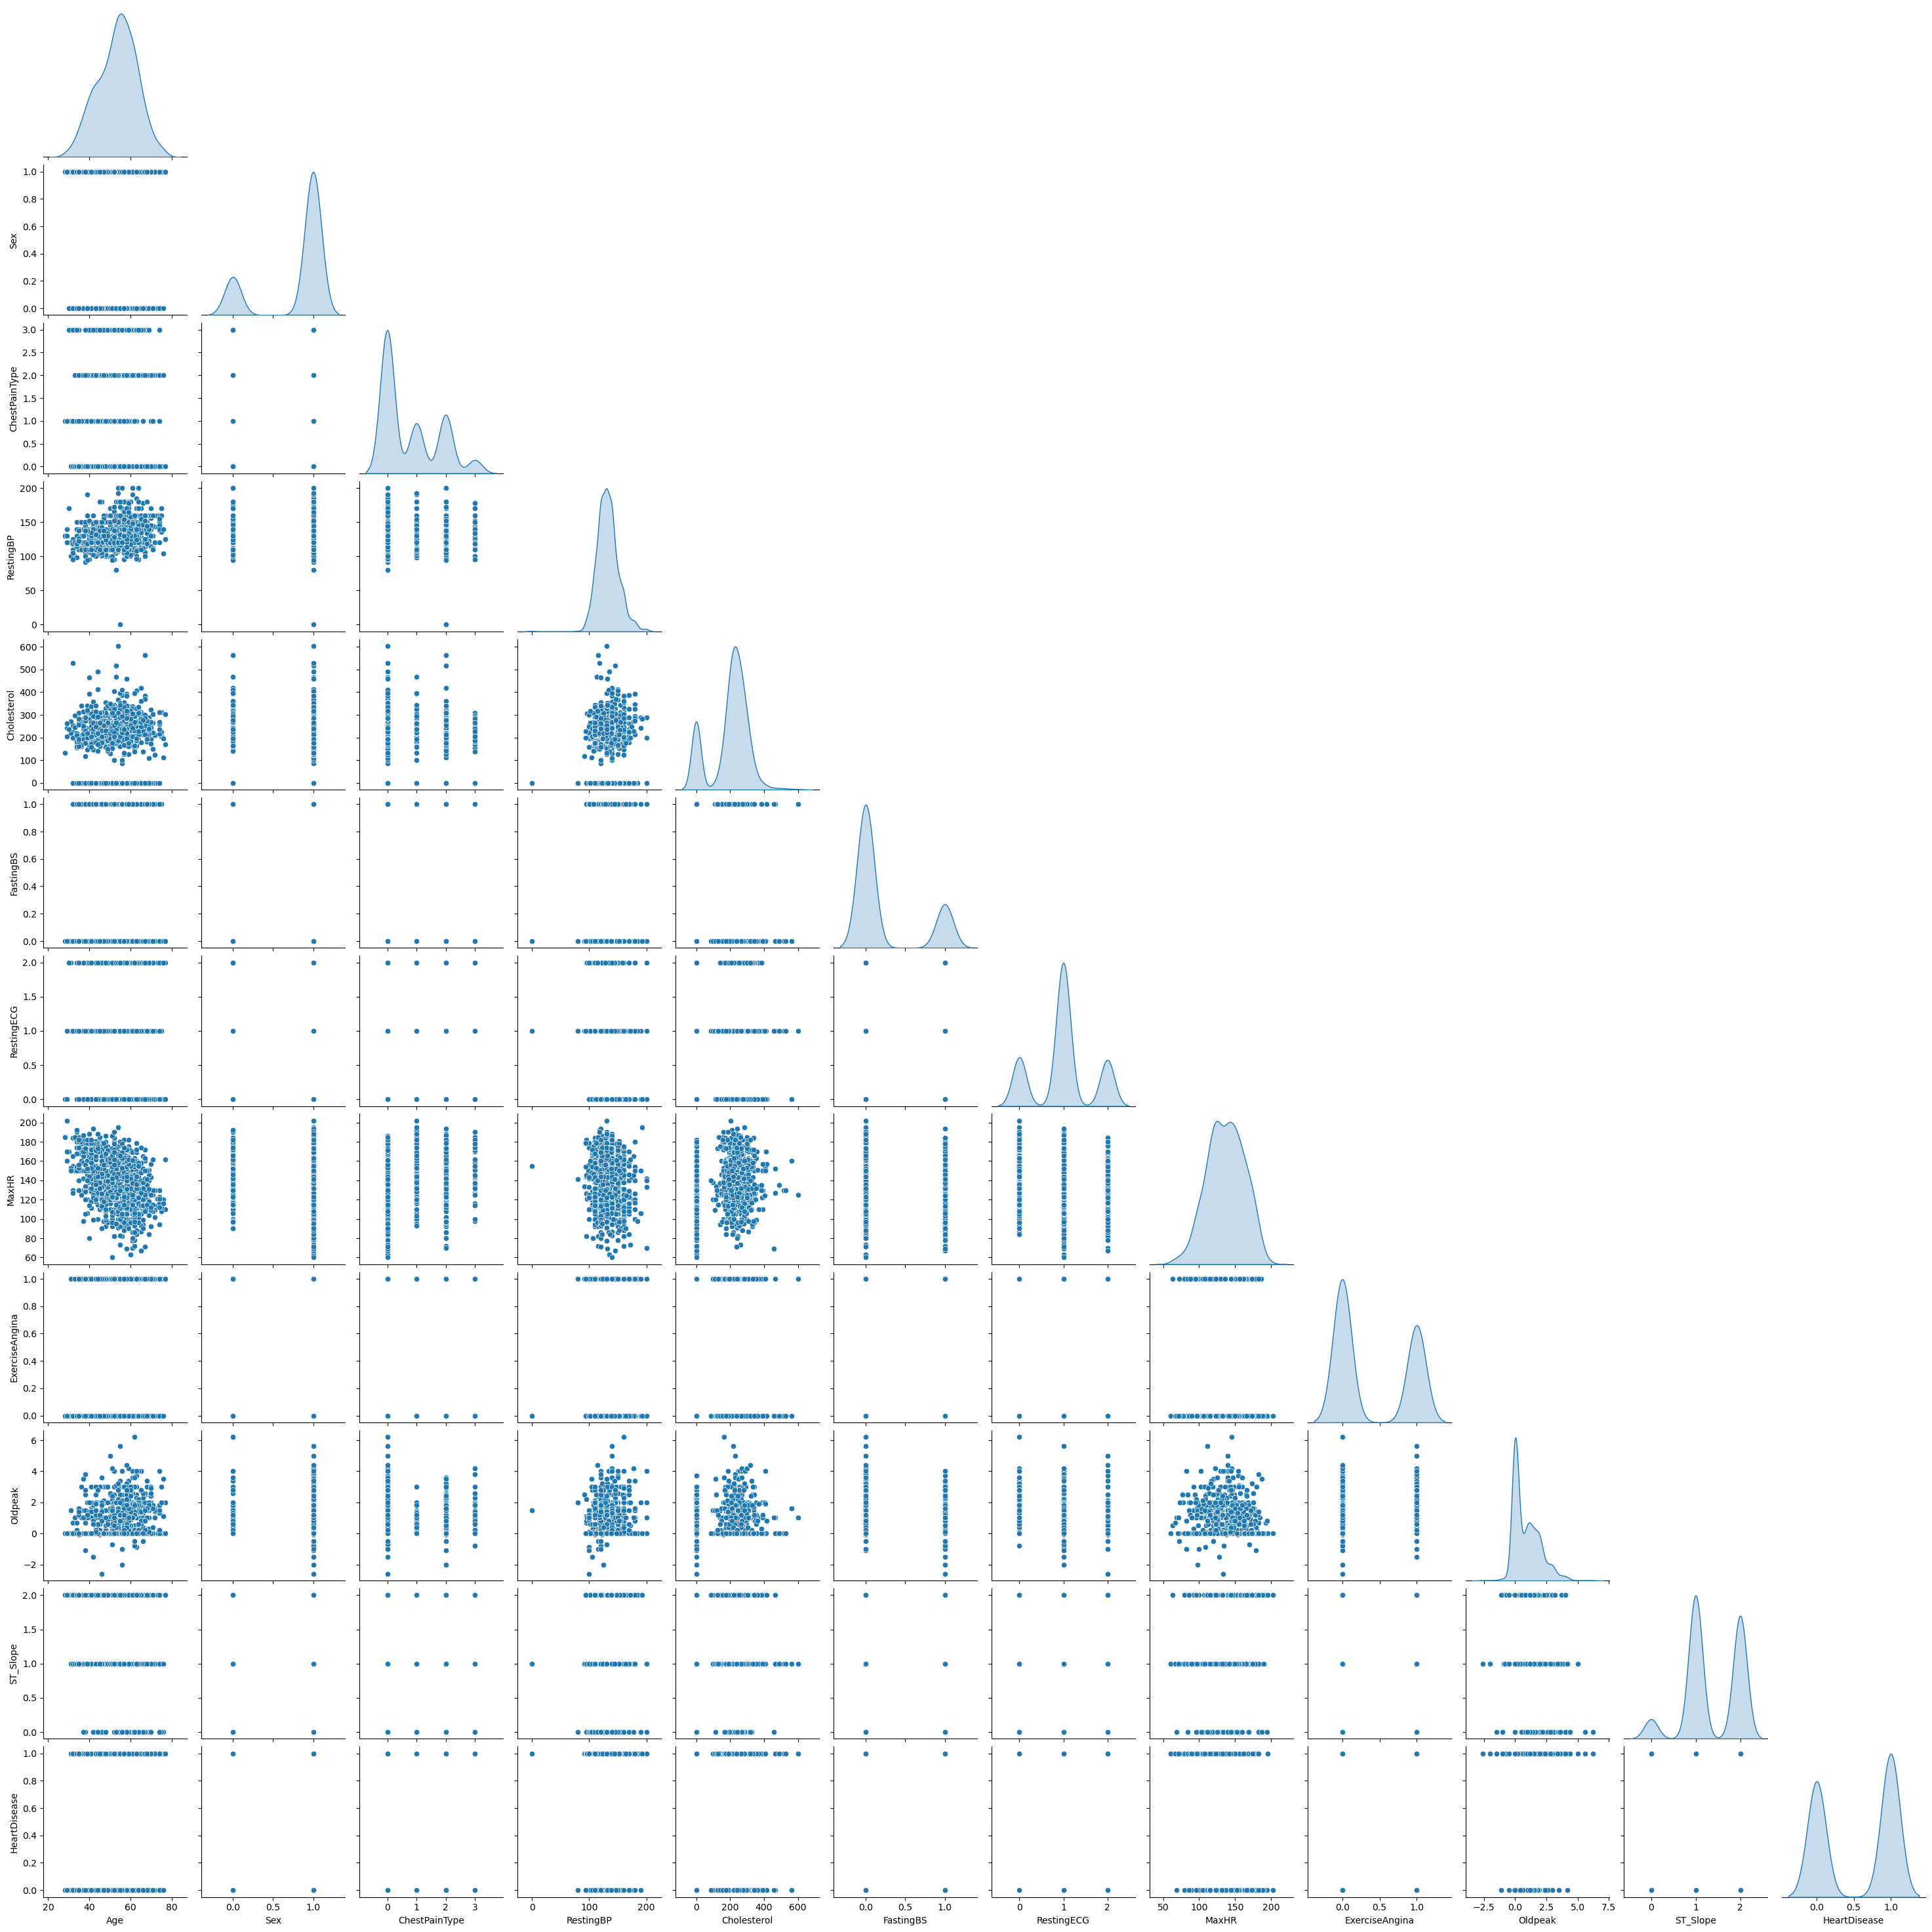

In [56]:
# Create pairplot to show scatter plots and histograms for every pair of variables in the dataset in order to explore relationships across all columns.
sns.pairplot(data, diag_kind='kde', corner=True)

# Display the plot
import matplotlib.pyplot as plt
plt.show()


In [57]:
# Use Random Forest Classifier to determine which parameter has the greatest effect on heart disease.

# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

# Separate features (X) and target (y)
X = data.drop(columns=['HeartDisease'])  # Drop the target column
y = data['HeartDisease']  # Target column

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions (optional: to evaluate model performance)
y_pred = rf_model.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

# Extract feature importances
importances = rf_model.feature_importances_
features = X.columns
feature_importance = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)

# Display the most important features
print(feature_importance)


Accuracy: 0.8804347826086957
           Feature  Importance
10        ST_Slope    0.241312
9          Oldpeak    0.123073
4      Cholesterol    0.107227
7            MaxHR    0.103848
8   ExerciseAngina    0.100046
2    ChestPainType    0.092671
0              Age    0.085520
3        RestingBP    0.066473
1              Sex    0.033963
6       RestingECG    0.026302
5        FastingBS    0.019565


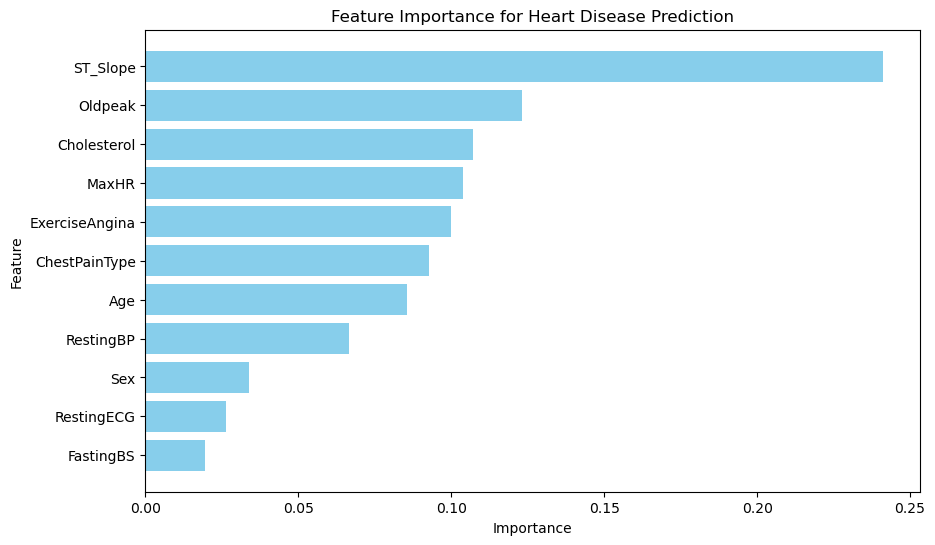

In [58]:
# Visualize feature importance
import matplotlib.pyplot as plt

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for Heart Disease Prediction')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()
